In [1]:
 

import importlib, DOCAPIscraper 
importlib.reload(DOCAPIscraper) 
from DOCAPIscraper import SPAPlaywrightScraper 
 
import json
from dataclasses import asdict
from pathlib import Path
 

In [2]:
scraper = SPAPlaywrightScraper()

url = "https://databento.com/docs/examples/futures/futures-introduction/finding-futures-contracts-with-highest-volume"

# 👇 En Jupyter puedes usar top-level await
page = await scraper.scrape_page(url)

print("URL:", page.url)
print("Título de página:", page.page_title)
print("Nº de ejemplos:", len(page.examples))

# Ver primer ejemplo (si existe)
if page.examples:
    ex = page.examples[0]
    print("\n--- Primer ejemplo ---")
    print("title:", ex.title)
    print("language:", ex.language)
    print("description:", ex.description[:200], "...")
    print("code:\n", ex.code)
    

payload = {
    "url": page.url,
    "page_title": page.page_title,
    "links": page.links,
    "examples": [asdict(ex) for ex in page.examples],
}

out_path = Path("out/one_page.json")
out_path.parent.mkdir(parents=True, exist_ok=True)
out_path.write_text(json.dumps(payload, ensure_ascii=False, indent=2), encoding="utf-8")
out_path

URL: https://databento.com/docs/examples/futures/futures-introduction/finding-futures-contracts-with-highest-volume
Título de página: Futures: Introduction
Nº de ejemplos: 9

--- Primer ejemplo ---
title: Finding futures contracts with highest volume
language: python
description: A quick way to find the most actively-traded futures contracts, across all expirations, is to fetch the daily volumes from the OHLCV-1d schema. (You can also get a similar result using the statistics  ...
code:
 import databento as db

# Create historical client
client = db.Historical("$YOUR_API_KEY")

def rank_by_volume(top=10):
    # Request OHLCV-1d data
    data = client.timeseries.get_range(
        dataset="GLBX.MDP3",
        symbols="ALL_SYMBOLS",
        schema="ohlcv-1d",
        start="2023-08-15"
    )

    # Convert to DataFrame and filter for top 10 instruments by volume
    df = data.to_df()
    return df.sort_values(by="volume", ascending=False)["instrument_id"].to_list()[:top]

top_instruments

PosixPath('out/one_page.json')

RenderedPage(url='https://databento.com/docs/', html='<!DOCTYPE html>\n<html lang="en"><head><meta charset="utf-8"/><link href="/brand/favicon.ico" rel="icon" sizes="32x32"/><link href="/brand/favicon.svg" rel="icon" type="image/svg+xml"/><link href="/brand/icon-180-unmasked.png" rel="apple-touch-icon"/><link href="/manifest.webmanifest" rel="manifest"/><meta content="width=device-width,initial-scale=1" name="viewport"/><meta content="Databento API reference documentation. Guides and example code for Python, Rust, C++, and our HTTP and Raw APIs." name="description"/><meta content="en_US" property="og:locale"/><meta content="article" property="og:type"/><meta content="Databento | Docs" property="og:title"/><meta content="Databento API reference documentation. Guides and example code for Python, Rust, C++, and our HTTP and Raw APIs." property="og:description"/><meta content="Databento" property="og:site_name"/><meta content="summary_large_image" name="twitter:card"/><meta content="Databe
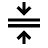

In [3]:
from scrapApi import SPADOMRenderer

renderer = SPADOMRenderer()

await renderer.render_to_file_async(
    "https://databento.com/docs/",
    "out/databento_quickstart.html",
)